### Sumário:
* 1. [Definição do Problema](#definicaoproblema)
* 2. [Análise Exploratória dos Dados](#eda)
    * 2.1 [Conclusão e Recomendações](#conclusao)  
* 3. [Criação do Modelo](#criacaomodelo)
    * 3.1 [Seleção de Atributos](#selecaoatributos)
    * 3.2 [Transformação de váriaveis Categoricas para Númericas](#tranformcaoattb)
    * 3.3 [Treino e Teste de Modelos](#treinoeteste)
    * 3.4 [Escolha do Modelo e Considerações Finais](#escolhamodelofinal)
* 4. [Respostas Outras Perguntas](#respostasperguntas)

In [3]:
import pandas as pd
import utils
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

<a id='definicaoproblema'></a>
### Definição do Problema:

A empresa Hobbit quer expandir seus negócios e para isso precisa automatizar o processo decisório de crédito, que até então vinha sendo feito de forma manual pelo seu time de analistas de crédito. Para isso, solicitou a você, cientista de dados, a análise da base dos créditos concedidos aos seus clientes no ano de 2020. O objetivo é, que a cada nova proposta de crédito, na sua plataforma digital, a aprovação (para bons clientes) ou recusa (para os maus clientes) seja decidida em poucos segundos.

<a id='eda'></a>
### Análise Exploratória dos Dados

Conjuntos de dados e dicionário dos Atributos:

https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

1 = BOM 2 = MAU

In [4]:
dados = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data',sep=" ",header=None)

Percebe-se que não há nenhum dado faltante conforme a documentação e que os estão com identifcadores de categorias, para diminuir o tamanho do arquivo. Para isso, será necessário mapear estes identifcadores para respectivas categorias e atributos e também adicionar um header no dataframe para facilitar a compreensão dos dados.

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [6]:
dados.isna().mean()

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
dtype: float64

In [7]:
dados.head(6)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


Foi criado um arquivo JSON com as colunas e respectivos categorias para cada identificador

In [8]:
valores_categoricos = json.load(open('./Dados/valores_categoricos.json'))

In [9]:
header = ['status_of_existing_checking_account','duration_in_month','credit_history','purpose','credit_amount',
          'savings_account_bonds','present_employment_since','installment_rate','personal_status_and_sex',
          'others_debtors_guarantors','present_residence_since','property','age','other_installment_plans',
          'housing','number_of_existing_credits_at_this_bank','job',
          'number_of_people_being_liable_to_provid_maintenance_for','telephone','foreign_worker','credit_risk']
dados.columns = header

In [10]:
for h in header:
    if h in valores_categoricos:
        dados[h] = dados[h].map(valores_categoricos[h])

In [11]:
dados.head()

,status_of_existing_checking_account,duration_in_month,credit_history,purpose,credit_amount,savings_account_bonds,present_employment_since,installment_rate,personal_status_and_sex,others_debtors_guarantors,...,property,age,other_installment_plans,housing,number_of_existing_credits_at_this_bank,job,number_of_people_being_liable_to_provid_maintenance_for,telephone,foreign_worker,credit_risk
0,< 0 DM,6,critical account / other credits existing (not...,radio/television,1169,unknown / no savings account,>= 7 years,4,male : single,None,...,real estate,67,None,own,2,skilled employee /official,1,"yes, registered under the customers name",yes,1
1,0 <= and < 200 DM,48,existing credits paind back duly till now,radio/television,5951,< 100DM,1 <= and < 4 years,2,female : divorced/separated/married,None,...,real estate,22,None,own,1,skilled employee /official,1,None,yes,2
2,no checking account,12,critical account / other credits existing (not...,education,2096,< 100DM,4 <= and < 7 years,2,male : single,None,...,real estate,49,None,own,1,unskilled-resident,2,None,yes,1
3,< 0 DM,42,existing credits paind back duly till now,furniture/equipment,7882,< 100DM,4 <= and < 7 years,2,male : single,guarantor,...,if not real estate : building society savings ...,45,None,for free,1,skilled employee /official,2,None,yes,1
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100DM,1 <= and < 4 years,3,male : single,None,...,unknown/no property,53,None,for free,2,skilled employee /official,2,None,yes,2


Nota-se que há um desbalanceamento de perfis onde que 70% dos clientes são perfis bons e outros 30% são maus

In [12]:
dados['credit_risk'].value_counts(normalize=True)

1    0.7
2    0.3
Name: credit_risk, dtype: float64

Nota-se que para perfis que são classificados como maus possuem 80% de ser menor ou igual 0 e menor 200 DM o valor da conta conta corrente, enquanto para perfis bons 49% não possuem uma conta corrente. Outro fato, interessante de ser analisado é que 77% de contas que possuem mais de 200 DM ou com atribuições de salários por pelo menos 1 ano não são de perfis considerados maus e que 88% de clientes que não possuem conta corrente são considerados bons perfis.

In [13]:
utils.tabela_frequencia(dados,'status_of_existing_checking_account','credit_risk')

no checking account                                 0.394
< 0 DM                                              0.274
0 <= and < 200 DM                                   0.269
> 200DM / salary assignments for at least 1 year    0.063
Name: status_of_existing_checking_account, dtype: float64


Porcentagem por Linha


credit_risk                                              1         2
status_of_existing_checking_account                                 
0 <= and < 200 DM                                 0.609665  0.390335
< 0 DM                                            0.507299  0.492701
> 200DM / salary assignments for at least 1 year  0.777778  0.222222
no checking account                               0.883249  0.116751


Porcentagem por Coluna


credit_risk                                              1         2
status_of_existing_checking_account                                 
0 <= and < 200 DM                                 0.234286  0.350000
< 0 DM                              

50% dos créditos considerados bons apresentam uma duração média de 19 meses, enquanto para créditos considerados maus a sua mediana é de 24 meses e tendo uma tendencia de ter uma duração maior e no máximo de 72 meses

             count       mean        std  min   25%   50%   75%   max
credit_risk                                                          
1            700.0  19.207143  11.079564  4.0  12.0  18.0  24.0  60.0
2            300.0  24.860000  13.282639  6.0  12.0  24.0  36.0  72.0


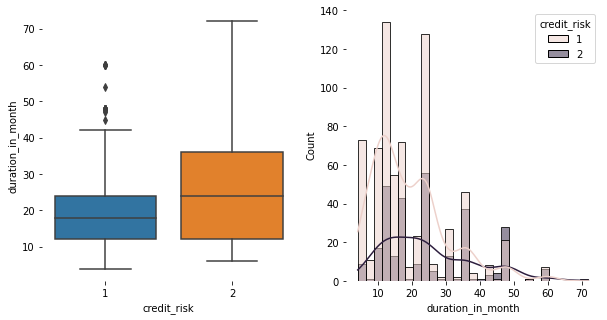

In [14]:
utils.plot_hist_box_plot(dados,'duration_in_month','credit_risk')

Nota-se que 82% das contas criticas ou da existencia de créditos em outro bancos são de clientes considerados bons e que 34% deste perfil possuem esta carateristica.  Além disso, mais do que 50% dos clientes indepedente do perfil não possuem créditos perdidos.

In [15]:
utils.tabela_frequencia(dados,'credit_history','credit_risk')

existing credits paind back duly till now                       0.530
critical account / other credits existing (not at this bank)    0.293
delay in paying off in the past                                 0.088
all credits at this band paid back duly                         0.049
no credits tanken/all credits paid back duly                    0.040
Name: credit_history, dtype: float64


Porcentagem por Linha


credit_risk                                                1         2
credit_history                                                        
all credits at this band paid back duly             0.428571  0.571429
critical account / other credits existing (not ...  0.829352  0.170648
delay in paying off in the past                     0.681818  0.318182
existing credits paind back duly till now           0.681132  0.318868
no credits tanken/all credits paid back duly        0.375000  0.625000


Porcentagem por Coluna


credit_risk                                                1   

Nota-se que 88% dos créditos de retreinamento são para clientes com perfis bons similar para carros usados que apresenta uma quantia de 83%.

In [16]:
utils.tabela_frequencia(dados,'purpose','credit_risk')

radio/television       0.280
car (new)              0.234
furniture/equipment    0.181
car (used)             0.103
business               0.097
education              0.050
reparis                0.022
others                 0.012
domestic appliances    0.012
retraining             0.009
Name: purpose, dtype: float64


Porcentagem por Linha


credit_risk                 1         2
purpose                                
business             0.649485  0.350515
car (new)            0.619658  0.380342
car (used)           0.834951  0.165049
domestic appliances  0.666667  0.333333
education            0.560000  0.440000
furniture/equipment  0.679558  0.320442
others               0.583333  0.416667
radio/television     0.778571  0.221429
reparis              0.636364  0.363636
retraining           0.888889  0.111111


Porcentagem por Coluna


credit_risk                 1         2
purpose                                
business             0.090000  0.113333
car (new)            0.2071

Em relação a quantidade de crédito percebe-se que há uma diferença entre os dois perfils. Clientes com perfis maus possuem a caracterstica de pedirem uma quantia maior de créditos tendo como média 3938 euros em relação a 2985 euros para perfis considerados bons.

             count         mean          std    min     25%     50%      75%  \
credit_risk                                                                    
1            700.0  2985.457143  2401.472278  250.0  1375.5  2244.0  3634.75   
2            300.0  3938.126667  3535.818955  433.0  1352.5  2574.5  5141.50   

                 max  
credit_risk           
1            15857.0  
2            18424.0  


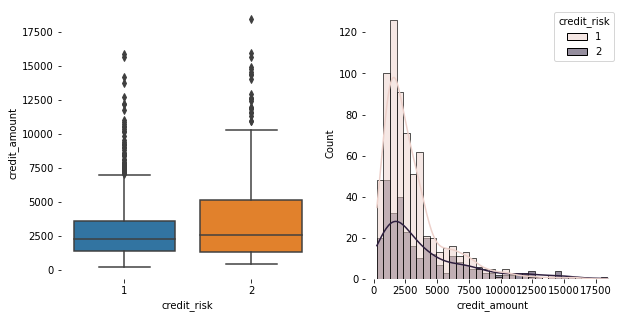

In [17]:
utils.plot_hist_box_plot(dados,'credit_amount','credit_risk')

Nota-se que 72% dos clientes considerados maus possuem a caracteritsitca de ter menos do que 100DM na conta poupança, enquanto para perfis bons é apenas 55% onde que os outros 21% se concentram na categoria de que possuem uma conta poupança

In [18]:
utils.tabela_frequencia(dados,'savings_account_bonds','credit_risk')

< 100DM                         0.603
unknown / no savings account    0.183
100 <= and < 500DM              0.103
500 <= and 1000 DM              0.063
>= 1000 DM                      0.048
Name: savings_account_bonds, dtype: float64


Porcentagem por Linha


credit_risk                          1         2
savings_account_bonds                           
100 <= and < 500DM            0.669903  0.330097
500 <= and 1000 DM            0.825397  0.174603
< 100DM                       0.640133  0.359867
>= 1000 DM                    0.875000  0.125000
unknown / no savings account  0.825137  0.174863


Porcentagem por Coluna


credit_risk                          1         2
savings_account_bonds                           
100 <= and < 500DM            0.098571  0.113333
500 <= and 1000 DM            0.074286  0.036667
< 100DM                       0.551429  0.723333
>= 1000 DM                    0.060000  0.020000
unknown / no savings account  0.215714  0.106667


Nota-se que a maiora dos clientes possuem menos de 1 ou 4 anos no emprego. Perfis considerados maus possuem 9% a mais de clientes com menos de 1 ano empregado.

In [19]:
utils.tabela_frequencia(dados,'present_employment_since','credit_risk')

1 <= and < 4 years    0.339
>= 7 years            0.253
4 <= and < 7 years    0.174
< 1 year              0.172
unemployed            0.062
Name: present_employment_since, dtype: float64


Porcentagem por Linha


credit_risk                      1         2
present_employment_since                    
1 <= and < 4 years        0.693215  0.306785
4 <= and < 7 years        0.775862  0.224138
< 1 year                  0.593023  0.406977
>= 7 years                0.747036  0.252964
unemployed                0.629032  0.370968


Porcentagem por Coluna


credit_risk                      1         2
present_employment_since                    
1 <= and < 4 years        0.335714  0.346667
4 <= and < 7 years        0.192857  0.130000
< 1 year                  0.145714  0.233333
>= 7 years                0.270000  0.213333
unemployed                0.055714  0.076667


Nota-se que não há uma diferença para taxa de parcelamento

             count      mean       std  min  25%  50%  75%  max
credit_risk                                                    
1            700.0  2.920000  1.128078  1.0  2.0  3.0  4.0  4.0
2            300.0  3.096667  1.088395  1.0  2.0  4.0  4.0  4.0


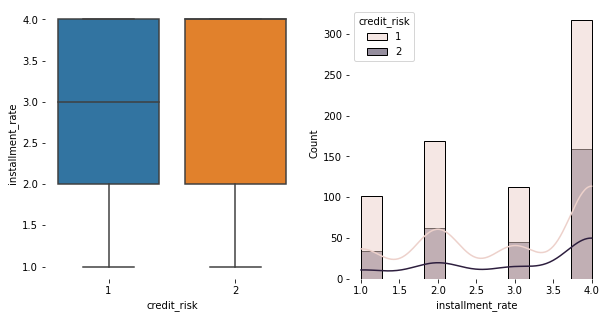

In [20]:
utils.plot_hist_box_plot(dados,'installment_rate','credit_risk')

A maioria dos créditos são de masculino e solteiros. Além disso, perfis considerados maus possuem uma diferença de 8% em mulheres divorcidas, separadas ou casadas em relação a perfis bons.

In [21]:
utils.tabela_frequencia(dados,'personal_status_and_sex','credit_risk')

male : single                          0.548
female : divorced/separated/married    0.310
male : married/windowed                0.092
male : divorced/separated              0.050
Name: personal_status_and_sex, dtype: float64


Porcentagem por Linha


credit_risk                                 1         2
personal_status_and_sex                                
female : divorced/separated/married  0.648387  0.351613
male : divorced/separated            0.600000  0.400000
male : married/windowed              0.728261  0.271739
male : single                        0.733577  0.266423


Porcentagem por Coluna


credit_risk                                 1         2
personal_status_and_sex                                
female : divorced/separated/married  0.287143  0.363333
male : divorced/separated            0.042857  0.066667
male : married/windowed              0.095714  0.083333
male : single                        0.574286  0.486667


In [22]:
dados['sex'] = dados['personal_status_and_sex'].str.split(':').str[0].str.strip()

In [23]:
utils.tabela_frequencia(dados,'sex','credit_risk')

male      0.69
female    0.31
Name: sex, dtype: float64


Porcentagem por Linha


credit_risk         1         2
sex                            
female       0.648387  0.351613
male         0.723188  0.276812


Porcentagem por Coluna


credit_risk         1         2
sex                            
female       0.287143  0.363333
male         0.712857  0.636667


90% do conjunto de dados não apresentar nenhum outro devedor fiador.

In [24]:
utils.tabela_frequencia(dados,'others_debtors_guarantors','credit_risk')

None            0.907
guarantor       0.052
co-applicant    0.041
Name: others_debtors_guarantors, dtype: float64


Porcentagem por Linha


credit_risk                       1         2
others_debtors_guarantors                    
None                       0.700110  0.299890
co-applicant               0.560976  0.439024
guarantor                  0.807692  0.192308


Porcentagem por Coluna


credit_risk                       1         2
others_debtors_guarantors                    
None                       0.907143  0.906667
co-applicant               0.032857  0.060000
guarantor                  0.060000  0.033333


Similar a taxa de desligamento não há uma diferença entre o tempo na residencia até então.

             count      mean       std  min  25%  50%  75%  max
credit_risk                                                    
1            700.0  2.842857  1.108373  1.0  2.0  3.0  4.0  4.0
2            300.0  2.850000  1.094605  1.0  2.0  3.0  4.0  4.0


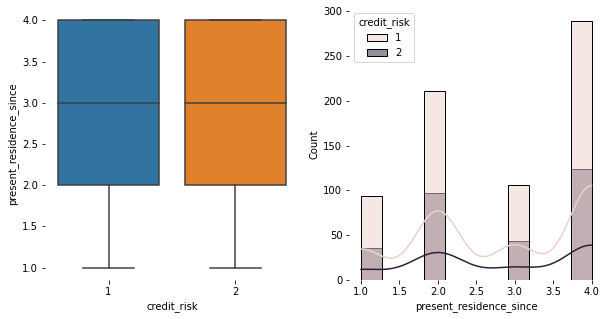

In [25]:
utils.plot_hist_box_plot(dados,'present_residence_since','credit_risk')

Percebe-se que 22% dos créditos com perfis considerados maus não apresentam um bem ou não, isto é uma diferença de 10% em relação créditos de perfis considerados bons. Além disso, perfis considerados bons apresentam 11% a mais de bens imobiliarios tendo com 31% em relação aos outros bens.

In [26]:
utils.tabela_frequencia(dados,'property','credit_risk')

if not others options : car or other, not in savings accounts/bonds       0.332
real estate                                                               0.282
if not real estate : building society savings agreement/life insurance    0.232
unknown/no property                                                       0.154
Name: property, dtype: float64


Porcentagem por Linha


credit_risk                                                1         2
property                                                              
if not others options : car or other, not in sa...  0.692771  0.307229
if not real estate : building society savings a...  0.693966  0.306034
real estate                                         0.787234  0.212766
unknown/no property                                 0.564935  0.435065


Porcentagem por Coluna


credit_risk                                                1         2
property                                                              
if not others options : car 

Não há uma diferença significativa entre a idade dos perfis até então, percebe-se que a média é 36 anos para créditos com perfis bons enquanto para perfis maus é 33 anos.

             count       mean        std   min   25%   50%    75%   max
credit_risk                                                            
1            700.0  36.224286  11.381145  19.0  27.0  34.0  42.25  75.0
2            300.0  33.963333  11.222379  19.0  25.0  31.0  40.00  74.0


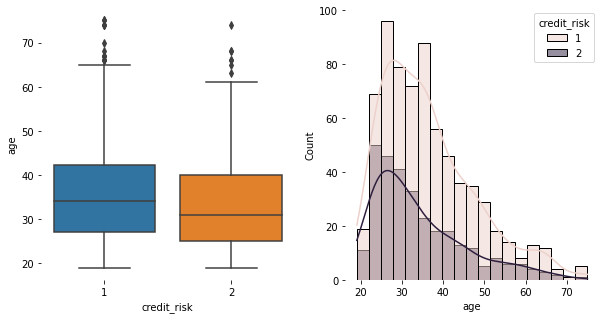

In [27]:
utils.plot_hist_box_plot(dados,'age','credit_risk')

81% dos clientes não possuem outro tipo de parcelamento, onde que 13% apresentam a opção banco.

In [28]:
utils.tabela_frequencia(dados,'other_installment_plans','credit_risk')

None      0.814
bank      0.139
stores    0.047
Name: other_installment_plans, dtype: float64


Porcentagem por Linha


credit_risk                     1         2
other_installment_plans                    
None                     0.724816  0.275184
bank                     0.589928  0.410072
stores                   0.595745  0.404255


Porcentagem por Coluna


credit_risk                     1         2
other_installment_plans                    
None                     0.842857  0.746667
bank                     0.117143  0.190000
stores                   0.040000  0.063333


17% apresentam que moram de aluguel e 10% apresentam como moradia gratuita. Talvez, incentivar a compra de imovel ou buscar um imovel melhor para morar.

In [29]:
utils.tabela_frequencia(dados,'housing','credit_risk')

own         0.713
rent        0.179
for free    0.108
Name: housing, dtype: float64


Porcentagem por Linha


credit_risk         1         2
housing                        
for free     0.592593  0.407407
own          0.739130  0.260870
rent         0.608939  0.391061


Porcentagem por Coluna


credit_risk         1         2
housing                        
for free     0.091429  0.146667
own          0.752857  0.620000
rent         0.155714  0.233333


A maioria dos clientes bons apresentam em média 1,42 credítos no banco e 1,36 credítos para perfis ruis. Tendo ambos perfis o máximo valor de 4 créditos.

             count      mean       std  min  25%  50%  75%  max
credit_risk                                                    
1            700.0  1.424286  0.584721  1.0  1.0  1.0  2.0  4.0
2            300.0  1.366667  0.559702  1.0  1.0  1.0  2.0  4.0


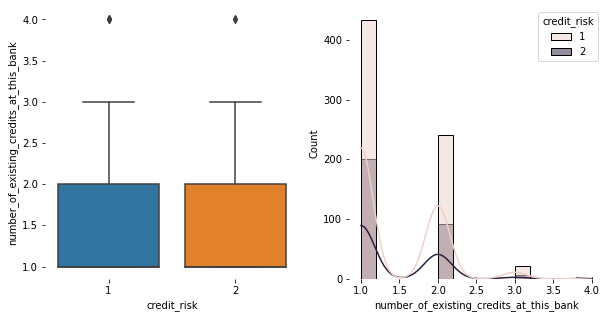

In [30]:
utils.plot_hist_box_plot(dados,'number_of_existing_credits_at_this_bank','credit_risk')

63% dos clientes funcionário / são oficiais

In [31]:
utils.tabela_frequencia(dados,'job','credit_risk')

skilled employee /official                                    0.630
unskilled-resident                                            0.200
management/self-employed/highly qualified employee/officer    0.148
unemployed/unskilled-non-resident                             0.022
Name: job, dtype: float64


Porcentagem por Linha


credit_risk                                                1         2
job                                                                   
management/self-employed/highly qualified emplo...  0.655405  0.344595
skilled employee /official                          0.704762  0.295238
unemployed/unskilled-non-resident                   0.681818  0.318182
unskilled-resident                                  0.720000  0.280000


Porcentagem por Coluna


credit_risk                                                1         2
job                                                                   
management/self-employed/highly qualified emplo...  0.138571  0.170000
skilled em

Nota-se que é para ambos os perfis apenas 1 pessoa é responsavel pela manutenção da conta.

             count      mean       std  min  25%  50%  75%  max
credit_risk                                                    
1            700.0  1.155714  0.362844  1.0  1.0  1.0  1.0  2.0
2            300.0  1.153333  0.360911  1.0  1.0  1.0  1.0  2.0


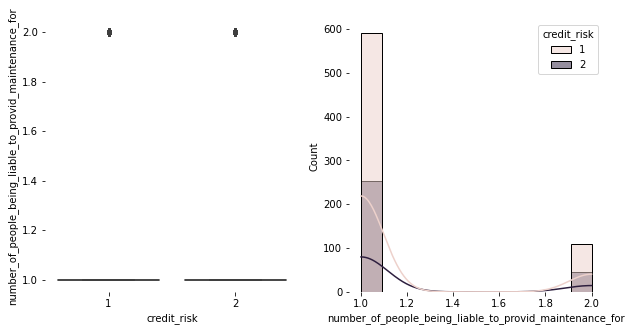

In [32]:
utils.plot_hist_box_plot(dados,'number_of_people_being_liable_to_provid_maintenance_for','credit_risk')

A maioria dos clientes não possuem telefone.

In [33]:
utils.tabela_frequencia(dados,'telephone','credit_risk')

None                                        0.596
yes, registered under the customers name    0.404
Name: telephone, dtype: float64


Porcentagem por Linha


credit_risk                                      1         2
telephone                                                   
None                                      0.686242  0.313758
yes, registered under the customers name  0.720297  0.279703


Porcentagem por Coluna


credit_risk                                      1         2
telephone                                                   
None                                      0.584286  0.623333
yes, registered under the customers name  0.415714  0.376667


96% dos créditos são de trabalhadores estrangeiros

In [34]:
utils.tabela_frequencia(dados,'foreign_worker','credit_risk')

yes    0.963
no     0.037
Name: foreign_worker, dtype: float64


Porcentagem por Linha


credit_risk            1         2
foreign_worker                    
no              0.891892  0.108108
yes             0.692627  0.307373


Porcentagem por Coluna


credit_risk            1         2
foreign_worker                    
no              0.047143  0.013333
yes             0.952857  0.986667


<a id='conclusao'></a>
#### Conclusões e Recomendações:
* Nota-se que 82% das contas criticas ou da existencia de créditos em outro bancos são de clientes considerados bons e que 34% deste perfil possuem esta carateristica. Desta forma, recomenda-se incentivar os bons clientes a adquirir mais créditos no banco e não em correntes;

* Clientes com perfis maus possuem a caracterstica de pedirem uma quantia maior de créditos tendo como média 3938 euros em relação a 2985 euros para perfis considerados bons. Aconselha-se a criação de limites de créditos por quantidade de créditos ou tempo.

* A maioria dos clientes bons apresentam em média 1,42 credítos no banco e 1,36 credítos para perfis ruis. Tendo ambos perfis o máximo valor de 4 créditos;

* Nota-se que 72% dos clientes considerados maus possuem a caracteritsitca de ter menos do que 100DM na conta poupança, enquanto para perfis bons é apenas 55% onde que os outros 21% se concentram na categoria de que possuem uma conta poupança. Desta forma, aconselha-se a recomendação de conta poupança para bons clientes;

* 81% dos clientes não possuem outro tipo de parcelamento, onde que 13% apresentam a opção banco;

* 22% dos créditos com perfis considerados maus não apresentam um bem ou não, isto é uma diferença de 10% em relação créditos de perfis considerados bons. Além disso, perfis considerados bons apresentam 11% a mais de bens imobiliarios tendo com 31% em relação aos outros bens;

* A média é 36 anos para créditos com perfis bons enquanto para perfis maus é 33 anos;

* 69% dos créditos são do genero Masculino. Além disso, perfis considerados maus possuem uma diferença de 8% em mulheres divorcidas, separadas ou casadas em relação a perfis bons. Desta forma, recomenda-se trazer mais diversidade para o uso de créditos;

* 17% apresentam que moram de aluguel e 10% apresentam como moradia gratuita. Como recomendação, o incentivo de compra de imoveis ou a busca de um imovel melhor para morar através de créditos;

* A maioria dos clientes não possuem telefone;






<a id='criacaomodelo'></a>
### Criação do Modelo:

Um modelo criado, satafiz a condidação de preveer dados futuros e também entender quais são as principais caracteristicas que diferem de um crédito com perfil bom para um mau. Para isso são seguidos 4 passos:
1. Seleção de Atributos
2. Transformação de variáveis categoricas para númericas
3. Treino e Teste de modelos

<a id='selecaoatributos'></a>
#### 1. Seleção de Atributos:
Esta etapa do processo, busca selecionar atributos que estão correlacionados com a variável alvo e que são relevantes para distinção entre os grupos da variável alvo. As duas técnicas abordadas para selecionar as variáveis analisam a variança entre os dados em relação aos grupos, verificando se há uma distinção.

Para variáveis categoricas foi utilizado o método de chi-quadrado e para variáveis númericas o método t-test.

In [35]:
def get_p_value_dependencia(dados,coluna):
    dtype_coluna = dados[coluna].dtype
    if dtype_coluna == 'O':
        contigencia = pd.crosstab(dados[coluna], dados['credit_risk'])
        return chi2_contingency(contigencia)[1]
    return ttest_ind(dados[dados['credit_risk']==1][coluna], dados[dados['credit_risk']==2][coluna])[1]

Foi utilizado como valor de significância estatística 0,05 (p-value), ou seja, se o p-value for menor do que 0,05 indica-se que há uma diferença entre aquele atributo para os dois tipos de perfis.

Nota-se que não podemos assumir se há uma diferença entre os perfis para os atributos:
* Emprego (Job)
* Tempo na residência (present residence since)
* Número de créditos existentes no banco (number of existing credits at this bank)
* Número de pessoas responsáveis por fornecer manutenção para (number of people being liable to provid maintenance for)

In [39]:
result_p_value = []
for i in dados.columns:
    result_p_value.append({'coluna':i,'p-value':get_p_value_dependencia(dados,i)})
dados_p_value = pd.DataFrame(result_p_value)
dados_p_value.sort_values(by='p-value',ascending=False)

,coluna,p-value
10,present_residence_since,9.253374e-01
17,number_of_people_being_liable_to_provid_mainte...,9.241409e-01
16,job,5.965816e-01
18,telephone,2.788762e-01
15,number_of_existing_credits_at_this_bank,1.484198e-01
9,others_debtors_guarantors,3.605595e-02
8,personal_status_and_sex,2.223801e-02
7,installment_rate,2.203549e-02
21,sex,2.073991e-02
19,foreign_worker,1.583075e-02


In [40]:
colunas_remover = list(dados_p_value[dados_p_value['p-value'] > 0.05]['coluna'].values)
dados_m_attb = dados.drop(colunas_remover,axis=1).copy()

<a id='tranformcaoattb'></a>
#### 2. Transformação de variáveis categoricas para númericas:

A maioria dos algoritmos para modelagem são feitos em base de números para realizar a computação. Desta forma, é necessário converter dados categoricos para valores númericos. Para atributos que possuem uma ordem ou comparação entre os valores foi transformado a categoria em valores ordenados de 1 até 5 e para atributos que não são ordinais foi tranformados para colunas em que cada coluna representa se aquele tipo de categoria esta presente ou não (One hot encoding)

Criando os conjuntos de dados para dados ordinais:

In [41]:
status_of_existing_checking_account_ordinal_label = {
    'no checking account':0,
    '< 0 DM': 1,
    '0 <= and < 200 DM':2,
    '> 200DM / salary assignments for at least 1 year':3
}

savings_account_bonds_ordinal_label = {
    'unknown / no savings account':0,
    '< 100DM':1,
    '500 <= and 1000 DM':2,
    '>= 1000 DM':3,
    '100 <= and < 500DM':4
}

present_employment_since_ordinal_label = {
    'unemployed':0,
    '>= 7 years':1,
    '1 <= and < 4 years':2,
    '4 <= and < 7 years':3,
    '< 1 year': 4
}

credit_risk_label = {
    1:0,
    2:1
}

Mapeando os valores categoricos para númericos:

In [38]:
dados_m_attb['status_of_existing_checking_account_ordinal_label'] = dados_m_attb['status_of_existing_checking_account'].map(status_of_existing_checking_account_ordinal_label)
dados_m_attb['savings_account_bonds_ordinal_label'] = dados_m_attb['savings_account_bonds'].map(savings_account_bonds_ordinal_label)
dados_m_attb['present_employment_since_ordinal_label'] = dados_m_attb['present_employment_since'].map(present_employment_since_ordinal_label)
dados_m_attb['credit_risk'] = dados_m_attb['credit_risk'].map(credit_risk_label)
dados_m_attb.drop(['status_of_existing_checking_account','savings_account_bonds','present_employment_since'],axis=1,inplace=True)

Selecionado atributos categoricos e sem ordem para aplicar o one hot encoding:

In [39]:
col_categoriacas = ['credit_history','foreign_worker',
                    'housing','other_installment_plans','others_debtors_guarantors',
                    'personal_status_and_sex','property','purpose','sex']
dummbies_categoricos = pd.get_dummies(dados_m_attb[col_categoriacas],prefix=col_categoriacas,drop_first=True)
dados_m_attb.drop(col_categoriacas,axis=1,inplace=True)
dados_m_attb = pd.concat([dados_m_attb,dummbies_categoricos],axis=1)

Percebe-se que a maioria dos atributos númericos não precisam de uma transformação, visto que a média é similar próxima a mediana e que também o desvio padrão é baixo.

In [40]:
col_numericas = ['age','credit_amount','duration_in_month',
                 'installment_rate','present_employment_since','present_residence_since',
                 'number_of_existing_credits_at_this_bank','number_of_people_being_liable_to_provid_maintenance_for']
dados[col_numericas].describe()

,age,credit_amount,duration_in_month,installment_rate,present_residence_since,number_of_existing_credits_at_this_bank,number_of_people_being_liable_to_provid_maintenance_for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000,2.973000,2.845000,1.407000,1.155000
std,11.375469,2822.736876,12.058814,1.118715,1.103718,0.577654,0.362086
min,19.000000,250.000000,4.000000,1.000000,1.000000,1.000000,1.000000
25%,27.000000,1365.500000,12.000000,2.000000,2.000000,1.000000,1.000000
50%,33.000000,2319.500000,18.000000,3.000000,3.000000,1.000000,1.000000
75%,42.000000,3972.250000,24.000000,4.000000,4.000000,2.000000,1.000000
max,75.000000,18424.000000,72.000000,4.000000,4.000000,4.000000,2.000000


<a id='treinoeteste'></a>
#### 3. Treino e Teste de modelos

Como modelos de predição e análise, buscou-se utilizar algoritmos de fácil interpretação. Além disso, há o problema do desbalanceamento das classes onde que 70% dos perfis são bons e 30% são maus.

Como métricas de validação foi utilizado:

* Acurácia - Número de predições testadas que estão corretas
* Recall (Sensibilidade) - A proporção de observações positivas preditas corretamente para todas as observações na classe correta (que deveria ser)


In [41]:
def exec_modelo(model,X_train,X_test,Y_train,y_test):
    print(type(model).__name__)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
     
    print("Acurácia: {:.2f}".format(accuracy_score(y_test,y_pred) * 100))
    print(classification_report(y_test,y_pred))

Como primeiro modelo, foi utilizado uma regressão lógistica para verificar a acurácia e quanto o modelo poderia ser afetado pelo desbalanceamento das classes.

In [42]:
X = dados_m_attb.drop('credit_risk',axis=1)
y = dados_m_attb['credit_risk']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42, stratify=y)

Nota-se que o modelo apresentado, possui uma acurácia de 73%, contudo um recall para classe desbalanceada de 32%, isto é, 68% do de perfis que eram para ser considerados maus estão sendo considerados bons. Desta forma, há necessidade de realizar um balanceamento de classes no conjunto de dados.

In [43]:
exec_modelo(LogisticRegression(max_iter=1000, random_state=42), X_train, X_test, y_train, y_test)

LogisticRegression
Acurácia: 73.67
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       210
           1       0.62      0.32      0.42        90

    accuracy                           0.74       300
   macro avg       0.69      0.62      0.63       300
weighted avg       0.72      0.74      0.71       300



Para o método de balanceamento de classes, foi utilizado duas técnicas:
* under_sampling (NearMiss) - Dimunição da amostragem de dados, utilizando técnicas de agrupamento. O algoritmo NearMiss, busca eliminar dados da classe majoritária que possuem caracteristicas mais proximas da classe desbalanceda.


* over_sampling (SMOTE) - Buscar inserir dados sintéticos através de técnicas de agrupamento. O algoritmo smote, escolhe dados aleatórios da classe minoritária e depois os k-vizinhos mais proximos destes dados. Desta forma, os dados sintéticos são criados entre dado aleatório da classe minoritária e o vizinho mais próximo.

Utilizando o modelo de NearMiss, ou seja, criar um conjunto de dados com 300 linhas de perfils bons e 300 maus. Percebe-se que a acurácia do modelo aumentou 3%, porém seu recall para perfis maus aumentou em 40% de assertividade.

In [44]:
nr = NearMiss()
X_nr,y_nr = nr.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_nr,y_nr, random_state=23, stratify=y_nr)

lr = LogisticRegression(max_iter=1000,random_state=10)
exec_modelo(lr, X_train, X_test, y_train, y_test)

print(y_train.value_counts())

LogisticRegression
Acurácia: 76.67
              precision    recall  f1-score   support

           0       0.74      0.81      0.78        75
           1       0.79      0.72      0.76        75

    accuracy                           0.77       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.77      0.77      0.77       150

1    225
0    225
Name: credit_risk, dtype: int64


Utilizando o método de Smote, percebe-se que houve um aumento de 4% na acuracia do modelo comparado ao modelo desbalanceado e um recall de 43% melhor. Em relação a técnica de under sampling, percebe-se que o modelo apresentou uma performace melhor tanto para acurácia, quanto para recall

In [45]:
smt = SMOTE()
X_smt, y_smt = smt.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_smt,y_smt, random_state=23, stratify=y_smt)

lr = LogisticRegression(max_iter=1000,random_state=90)
exec_modelo(lr, X_train, X_test, y_train, y_test)
print(y_train.value_counts())

LogisticRegression
Acurácia: 77.14
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       175
           1       0.79      0.74      0.76       175

    accuracy                           0.77       350
   macro avg       0.77      0.77      0.77       350
weighted avg       0.77      0.77      0.77       350

1    525
0    525
Name: credit_risk, dtype: int64


Percebe-se que utilizando um modelo de ensemble e outro modelo interpretavel que é árvores de decisões. Métodos de ensemble utilizam a combinação de vários modelos que neste caso são árvores de decisões para se obter um resultado único que é dado pela voto da maioria para aquela classe.

A acurácia  deste modelo, aumentou em 4% utilizando a tecnica de SMOTE e aumentou em 5% o recall para perfis maus em relação ao modelo de regressão logística com SMOTE. 

In [46]:
rc = RandomForestClassifier(n_estimators=100, random_state = 42)
exec_modelo(rc, X_train, X_test, y_train, y_test)

RandomForestClassifier
Acurácia: 80.57
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       175
           1       0.82      0.79      0.80       175

    accuracy                           0.81       350
   macro avg       0.81      0.81      0.81       350
weighted avg       0.81      0.81      0.81       350



<a id='escolhamodelofinal'></a>
Como modelo será utilizado o RandomForest por apresentar uma acurácia maior e um recall.

In [47]:
pickle.dump(rc, open('model.pkl', 'wb'))


Os principais atributos que distinguem entre perfis bons e maus são:

* Quantidade de crédito
* status da conta corrente existente
* idade
* duração no mês
* conta crítica do histórico de crédito / outros créditos existentes (não neste banco) 

#### Considerações Finais:

* Clientes maus apresentam em média 954 euros a mais de créditos;
* Créditos com perfis bons são mais tendenciosos a não ter uma conta corrente, enquanto com Créditos maus possuem 80% de ser menor ou igual 0 e menor 200 DM
* Créditos com perfis maus tendem em média ter 5 meses a mais de uso de créditos
* A diferença entre idades dos perfis é de 3 anos sendo que perfis maus são mais novos com média 33 anos.
* Perfis bons tendem a ter mais contas criticas ou creditos em outros bancos.

In [48]:
feature_importances = pd.DataFrame(rc.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head()

,importance
credit_amount,0.114682
status_of_existing_checking_account_ordinal_label,0.106280
duration_in_month,0.092434
age,0.083679
credit_history_critical account / other credits existing (not at this bank),0.058719
